# Tutorial: finding wells

We're going to try and find some wells!

We will download the relevant data using this package (python-sa-gwdata) -- importable as ``sa_gwdata`` -- and use some other packages for other things:

- matplotlib, numpy, pandas - used in the background

In [22]:
import sa_gwdata

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx

This step is optional:

You can specify the working coordinate reference system (CRS). I'm going to use [SA Lambert GDA2020](https://epsg.io/8059), which is in eastings and northings and covers the whole state. You can pick any!

In [23]:
session = sa_gwdata.get_global_session(working_crs="EPSG:8059")

This variable (``session``), you can either use, or ignore. If you use the module-level functions as shown below, the package will use ``session`` in the background. There are some subtle differences which you can see more information about HERE (TODO)

## Search for wells by suburb

Where do we start? Let's download a list of all wells in Semaphore as a start.

In [24]:
wells = sa_gwdata.search_by_suburb("semaphore")

If you have geopandas installed, this will return you a ``geopandas.GeoDataFrame`` object, which already contains spatial points for the wells in the ``geometry`` column.

In [25]:
wells

,dhno,lat,lon,mapnum,unit_no,max_depth,aq_mon,swl,tds,class,...,latest_open_date,name,drill_date,purp_desc,stat_desc,yield,latest_yield_date,permit_no,replaceunitnum,geometry
0,27451,-34.835571,138.483647,652800323.0,6528-323,6.71,Qhcks,5.49,671.0,WW,...,1934-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (138.48365 -34.83557)
1,27452,-34.833056,138.484522,652800324.0,6528-324,5.18,Qhcks,NaN,799.0,WW,...,1934-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (138.48452 -34.83306)
2,27455,-34.837983,138.479954,652800327.0,6528-327,NaN,Qhcks,1.22,1556.0,WW,...,1934-09-01,"TODD""S RESERVE",1934-09-01,NaN,NaN,NaN,NaN,NaN,NaN,POINT (138.47995 -34.83798)
3,27461,-34.837697,138.487967,652800333.0,6528-333,6.10,Qhcks,2.44,1145.0,WW,...,1967-11-13,NaN,NaN,DOM,OPR,NaN,NaN,NaN,NaN,POINT (138.48797 -34.83770)
4,27462,-34.836557,138.485530,652800334.0,6528-334,6.10,Qhcks,3.05,670.0,WW,...,1967-11-13,NaN,NaN,DOM,OPR,NaN,NaN,NaN,NaN,POINT (138.48553 -34.83656)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,331684,-34.838582,138.488233,652802983.0,6528-2983,5.80,NaN,3.20,NaN,WW,...,2019-11-20,NaN,2019-11-20,DOM,NaN,0.4,2019-11-20,354724.0,NaN,POINT (138.48823 -34.83858)
140,332207,-34.837590,138.486967,652802985.0,6528-2985,5.80,NaN,0.00,NaN,WW,...,2019-11-20,NaN,2019-11-20,DOM,NaN,0.4,2019-11-20,354882.0,NaN,POINT (138.48697 -34.83759)
141,353537,-34.843205,138.486937,652803031.0,6528-3031,2.50,NaN,NaN,NaN,WW,...,2020-12-17,NaN,2020-12-17,MON,NaN,NaN,NaN,389634.0,NaN,POINT (138.48694 -34.84320)
142,353538,-34.842472,138.487761,652803032.0,6528-3032,2.50,NaN,NaN,NaN,WW,...,2020-12-17,NaN,2020-12-17,MON,NaN,NaN,NaN,389635.0,NaN,POINT (138.48776 -34.84247)


In [26]:
wells.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dhno               144 non-null    int64   
 1   lat                144 non-null    float64 
 2   lon                144 non-null    float64 
 3   mapnum             144 non-null    float64 
 4   unit_no            144 non-null    object  
 5   max_depth          142 non-null    float64 
 6   aq_mon             136 non-null    object  
 7   swl                103 non-null    float64 
 8   tds                121 non-null    float64 
 9   class              144 non-null    object  
 10  title_prefix       134 non-null    object  
 11  title_volume       134 non-null    object  
 12  title_folio        134 non-null    object  
 13  hund               144 non-null    object  
 14  parcel             134 non-null    object  
 15  parcelno           134 non-null    object  
 16  

Plot these wells with a background map:

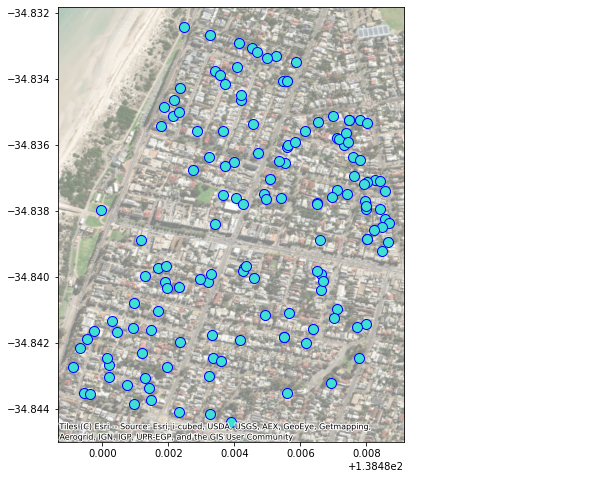

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
wells.geometry.plot(fc='turquoise', ec='b', marker='o', markersize=100, ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=session.working_crs, alpha=0.5)

The field "aq_mon" contains data on which aquifer the wells is completed in:

In [28]:
wells.aq_mon.fillna("NA").value_counts()

Qhcks         132
NA              8
Qhck            2
Tomw(T1)        1
Qhcks+Qpah      1
Name: aq_mon, dtype: int64

There's only one well monitoring the T1 aquifer so let's expand our search to include nearby suburbs.

In [29]:
wells = pd.concat(
    [
        sa_gwdata.search_by_suburb(suburb) for suburb in 
        ("semaphore", "semaphore south", "semaphore park", "ethelton", "largs bay", "birkenhead")
    ]
)

In [30]:
wells.aq_mon.fillna("NA").value_counts()

Qhcks         647
Qhck          359
NA             50
Qpah           41
Tomw(T1)        5
Qhcks+Qpah      1
Tomw(T2)        1
Name: aq_mon, dtype: int64

That's better

In [31]:
t_wells = wells[wells.aq_mon.isin(["Tomw(T1)", "Tomw(T2)"])]

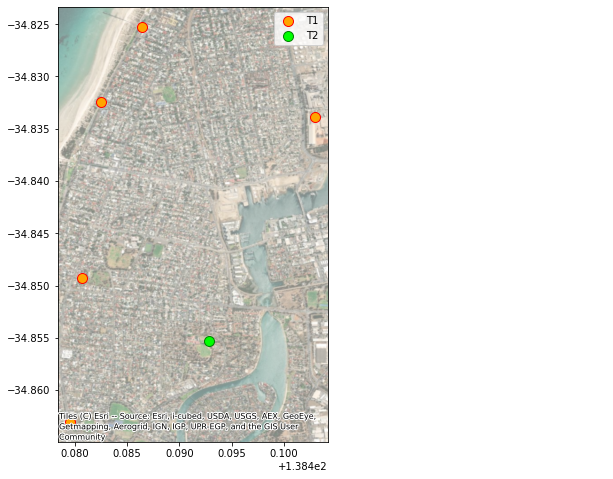

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
t_wells[t_wells.aq_mon == "Tomw(T1)"].geometry.plot(fc='orange', ec='r', marker='o', markersize=100, ax=ax, label="T1")
t_wells[t_wells.aq_mon == "Tomw(T2)"].geometry.plot(fc='lime', ec='green', marker='o', markersize=100, ax=ax, label="T2")
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=session.working_crs, alpha=0.5)
ax.legend()

In [33]:
t_wells

,dhno,lat,lon,mapnum,unit_no,max_depth,aq_mon,swl,tds,class,...,stat_desc,yield,latest_yield_date,permit_no,replaceunitnum,geometry,obsnumber,obsnetwork,swlstatus,salstatus
125,206608,-34.832417,138.482484,652802547.0,6528-2547,154.00,Tomw(T1),NaN,NaN,Strat,...,NaN,NaN,NaN,NaN,NaN,POINT (138.48248 -34.83242),NaN,NaN,NaN,NaN
5,27545,-34.849275,138.480715,652800417.0,6528-417,103.02,Tomw(T1),9.14,7600.0,WW,...,BKF,NaN,NaN,NaN,NaN,POINT (138.48072 -34.84928),NaN,NaN,NaN,NaN
9,27582,-34.863053,138.479540,652800454.0,6528-454,173.13,Tomw(T1),9.75,3027.0,WW,...,UKN,17.68,1951-07-20,NaN,NaN,POINT (138.47954 -34.86305),NaN,NaN,NaN,NaN
13,27587,-34.855317,138.492849,652800459.0,6528-459,198.12,Tomw(T2),5.18,2792.0,WW,...,BKF,19.32,1971-08-23,254671.0,NaN,POINT (138.49285 -34.85532),NaN,NaN,NaN,NaN
0,27150,-34.825235,138.486454,652800003.0,6528-3,92.96,Tomw(T1),3.05,1385.0,PW,...,ABD,1.00,1931-12-01,NaN,NaN,POINT (138.48645 -34.82524),NaN,NaN,NaN,NaN
75,51506,-34.833889,138.503017,662804537.0,6628-4537,108.20,Tomw(T1),3.66,2585.0,WW,...,NaN,15.15,1960-03-16,NaN,NaN,POINT (138.50302 -34.83389),NaN,NaN,NaN,NaN


## Searching by location and radius

Let's look for wells near a mine like Prominent Hill:

using a radius search of 30 km

In [34]:
lat = -29.827870
lon = 135.610701
radius_km = 30

wells = sa_gwdata.search_by_radius(lat, lon, radius_km)

In [35]:
wells

,dhno,lat,lon,mapnum,max_depth,drill_date,swl,tds,stat_desc,class,...,permit_no,yield,latest_yield_date,aq_mon,obsnumber,obsnetwork,swlstatus,salstatus,replaceunitnum,geometry
0,9758,-30.005110,135.399494,593700062.0,30.78,1962-05-08,21.64,743.0,ABD,WW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.39949 -30.00511)
1,9759,-30.025724,135.413100,593700063.0,33.53,1962-05-02,NaN,NaN,ABD,WW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.41310 -30.02572)
2,9820,-30.024907,135.455566,593700124.0,130.00,1981-01-01,NaN,NaN,UKN,MW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.45557 -30.02491)
3,332884,-30.053247,135.479734,593700537.0,65.50,2019-12-02,54.00,6977.0,OPR,WW,...,342340.0,1.00,2019-12-02,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.47973 -30.05325)
4,9968,-29.871678,135.345502,593800010.0,89.47,1930-01-01,77.87,7609.0,NIU,WW,...,NaN,0.42,1952-07-30,K-c(unconf),NaN,NaN,NaN,NaN,NaN,POINT (135.34550 -29.87168)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,371260,-29.976768,135.654835,603800689.0,351.10,2006-10-14,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.65484 -29.97677)
980,371261,-29.960878,135.623841,603800690.0,70.00,2006-10-22,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.62384 -29.96088)
981,371262,-29.964527,135.654839,603800691.0,96.00,2006-11-21,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.65484 -29.96453)
982,371263,-29.968547,135.686714,603800692.0,86.00,2006-11-18,NaN,NaN,NaN,MW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (135.68671 -29.96855)


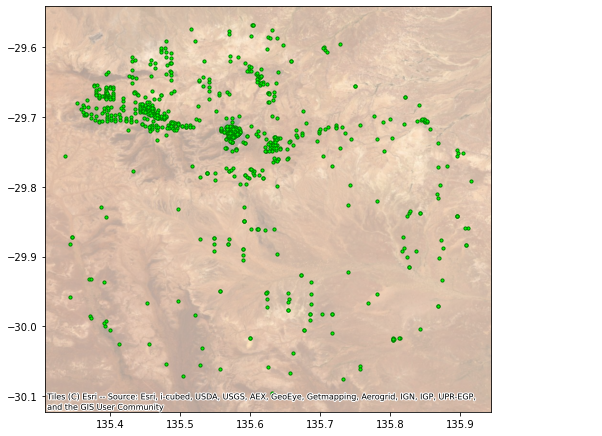

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
wells.geometry.plot(fc='lime', ec='green', marker='o', markersize=10, ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=session.working_crs, alpha=0.5)

Let's also put the search point on this map so we can see what happened

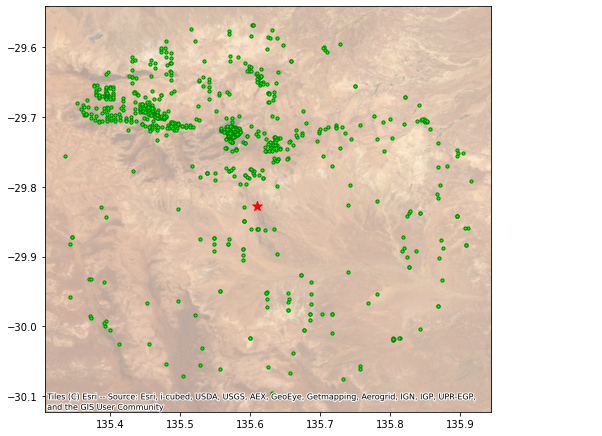

<Figure size 432x288 with 0 Axes>

In [37]:
search_df = pd.DataFrame({'lat': [lat], 'lon': [lon]})
search_pts = gpd.GeoDataFrame(
    search_df, crs="EPSG:4326", geometry=gpd.points_from_xy(search_df.lon, search_df.lat)
).to_crs(session.working_crs)

search_pts.geometry.plot(marker='*', c='red', markersize=100, label='Search point', ax=ax, aspect=1)

ax.figure

## Searching by a rectangle

Let's search for wells in a rectangle - shall we try to retrieve a cross section of wells across the Adelaide Plains below the Para Fault?

I'll need to get the latitude and longitude of the:

- south-western corner i.e. **bottom left** (min latitude and min longitude) and the
- north-eastern corner i.e. **top right** (max latitude and max longitude)

In [38]:
ne_corner = -34.901291, 138.484388
sw_corner = -34.941296, 138.625417

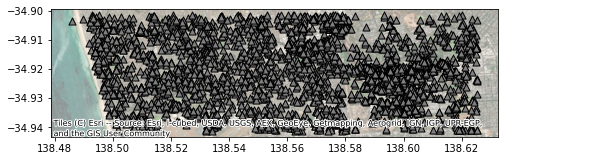

In [39]:
wells = sa_gwdata.search_by_rect(ne_corner, sw_corner)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
wells.geometry.plot(fc='grey', ec='black', marker='^', markersize=50, ax=ax)
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=session.working_crs, alpha=0.5)